In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3)

In [4]:
X

array([[ 0.93781272, -2.68808684],
       [-1.12028593,  1.22925747],
       [ 2.32554313,  2.3860973 ],
       ...,
       [ 0.69739952, -0.80751011],
       [ 0.92325836,  0.12117747],
       [-0.49582991,  1.13546757]])

In [5]:
y

array([-3.82376987e+01,  1.91819925e+01,  3.90019153e+01,  7.08509519e+00,
       -2.22161382e+01, -3.92546956e+00, -9.62830951e+00,  1.16927281e+01,
       -2.61601958e+01,  1.25373503e+01,  6.07902145e-01, -3.24056337e+01,
       -2.14556214e+00, -1.62219112e+01, -1.50858544e+01,  2.38668470e+01,
        6.39458103e+00, -1.66810475e+01, -2.01305671e+01, -8.40722291e+00,
        3.42855755e+01, -1.95470095e+00, -1.01211882e+00,  3.93786590e+01,
        2.19424530e+01,  5.12397876e+00, -3.62122323e+00,  1.39934814e+01,
       -1.42016031e+01, -5.24538788e+00,  1.78772289e+01, -5.60703686e+00,
        1.11726645e+01,  1.38184834e+00,  1.87742758e+01,  5.72495530e+00,
        3.78068747e+00,  1.06885528e+01,  1.07945743e+01,  3.49026773e+01,
       -2.16825639e+01,  5.09982933e+00,  1.82111468e+01, -4.54046242e+01,
       -9.50898495e+00, -2.34378756e+01,  2.14851432e+01,  7.09065548e+00,
        4.95080391e+00, -1.44048303e+01, -1.25502924e+01,  2.67708419e+00,
       -4.66074738e+00,  

In [6]:
# noise 3 means 2 outliers

<Axes: xlabel='0', ylabel='1'>

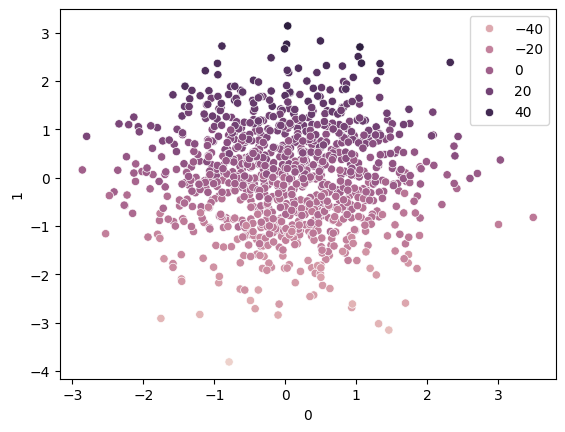

In [8]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)

In [11]:
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [12]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr

SVR(kernel='linear')

In [13]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [14]:
svr.coef_

array([[ 0.24473283, 15.39658451]])

In [18]:
y_pred = svr.predict(X_test)
y_pred

array([  3.66224735,  14.20789719,  19.12896885, -19.02251729,
       -16.74653143,  17.43309057,  27.13931376,  -2.43326658,
        -5.37768562,  -9.6623582 , -22.05406777,  11.71392652,
       -20.59358757,  15.60696361, -31.52035804,   9.00722635,
        -7.10267283, -12.26971526,  24.63420677,  -9.41736591,
       -12.50457869,   9.95932333,   9.63458127,  24.89138731,
         1.96147382,  -5.04610434,  12.46771126, -22.85710228,
         8.45993383, -18.03605661,  19.7867948 , -30.26079206,
       -11.77870951,  -0.12444653,  16.19451393,   5.09621552,
         0.47443004,  17.63012912,  -0.9468881 ,  -3.45869449,
       -14.17297037, -11.619019  ,   2.41552759,   8.14712455,
         6.09154832,  -5.21966446,  18.26119757,   9.16163517,
        -7.36550476, -17.0081684 ,  -1.56484326,  17.20093678,
        -0.21912778,   8.69250274,  11.68452586,  12.45639777,
         0.81601136, -18.53495559,  -8.31903276, -19.69674269,
       -12.04278671,  31.04308474, -15.72749531,  -0.19

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9625133734613087

In [21]:
## Hyperparameter tuning with SVR
params = {'C' : [1, 2, 3, 10, 50, 120, 100],
          'gamma' : [1, 0.1, 0.2, 0.001, 0.003],
          'kernel' : ['linear'],
          'epsilon' : [0.01, 0.1, 0.2, 0.3]}

In [22]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVR(), param_grid = params, cv = 5, verbose = 3)

In [23]:
grid

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 10, 50, 120, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [24]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.958 total time=   0.1s
[CV 2/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.966 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.964 total time=   0.1s
[CV 4/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.968 total time=   0.1s
[CV 5/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.957 total time=   0.1s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.958 total time=   0.1s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.966 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.964 total time=   0.1s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.968 total time=   0.1s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.957 total time=   0.1s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.2, kern

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 10, 50, 120, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [25]:
grid.best_params_

{'C': 3, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [26]:
grid.best_score_

np.float64(0.9629694133437354)

In [27]:
grid.best_estimator_

SVR(C=3, epsilon=0.3, gamma=1, kernel='linear')

In [29]:
y_pred = grid.best_estimator_.predict(X_test)

In [30]:
r2_score(y_test, y_pred)

0.9625310714614939